In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("C:/Users/ACER/OneDrive - University of Jaffna/UOJ/Education/Research/Data Sets/GSE140842/data2.csv", index_col=0)

In [18]:
df.head()

,Diagnosis,OR4F5,AL627309.1,OR4F29,OR4F16,AL669831.1,AL645608.2,SAMD11,NOC2L,KLHL17,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
SEQ12179,0,5.181797,6.179015,4.727253,4.727253,5.181797,4.727253,6.448955,6.668955,6.348396,...,5.181797,4.727253,4.727253,4.727253,4.727253,4.727253,4.727253,4.727253,4.727253,5.181797
SEQ12182,1,4.727253,6.085531,5.102764,5.256828,5.374064,5.634632,6.291008,6.558533,6.039314,...,4.727253,4.727253,4.727253,4.727253,4.727253,4.727253,5.102764,4.727253,4.727253,5.374064
SEQ12199,0,5.236380,7.428169,5.349217,5.443627,5.236380,5.236380,6.733031,7.013539,6.756903,...,4.727253,4.727253,4.727253,5.526190,4.727253,4.727253,5.236380,4.727253,4.727253,5.236380
SEQ12196,1,5.145956,6.904024,5.145956,4.727253,5.210170,5.266549,6.653595,6.986734,6.698891,...,4.969556,4.727253,4.727253,4.727253,4.727253,4.727253,4.727253,4.969556,4.727253,5.069520
SEQ12201,0,5.467904,7.098594,5.253815,5.420998,5.100616,5.315164,6.663280,6.852839,6.780346,...,5.100616,4.727253,4.727253,4.727253,4.727253,4.727253,4.727253,4.991628,4.727253,4.727253


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, SEQ12179 to SEQ12172
Columns: 18602 entries, Diagnosis to MT-CYB
dtypes: float64(18601), int64(1)
memory usage: 9.9+ MB


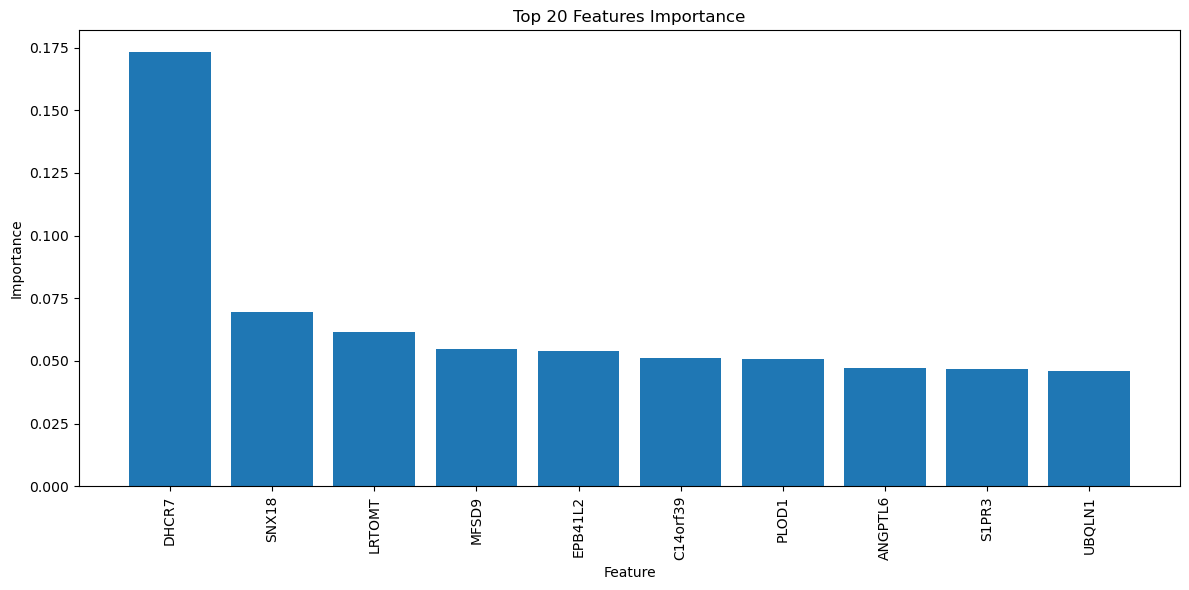

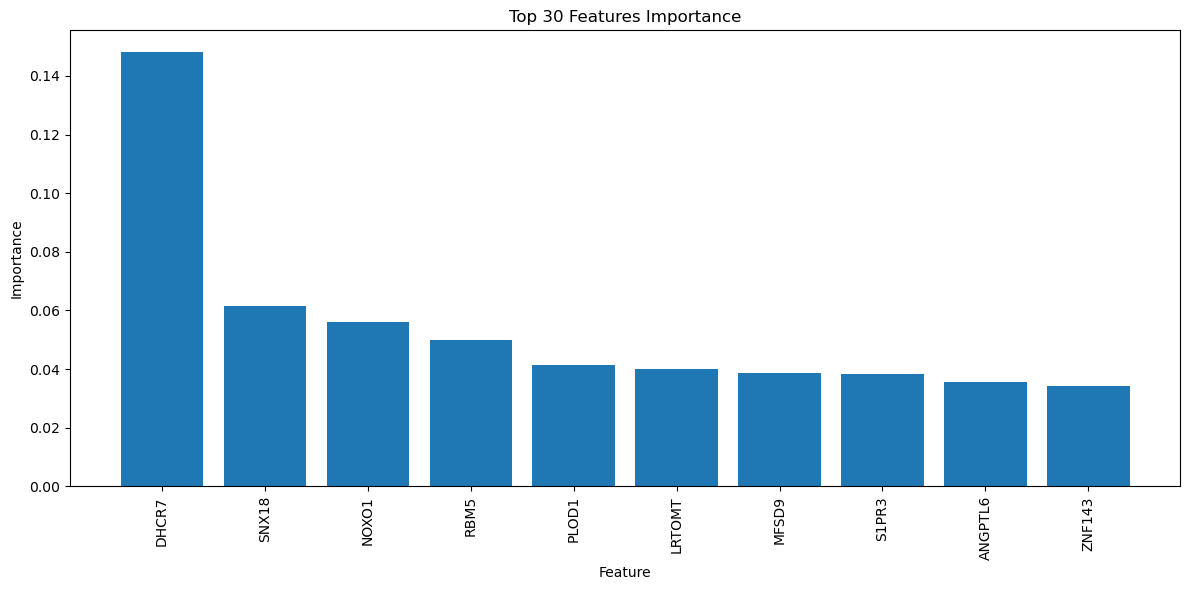

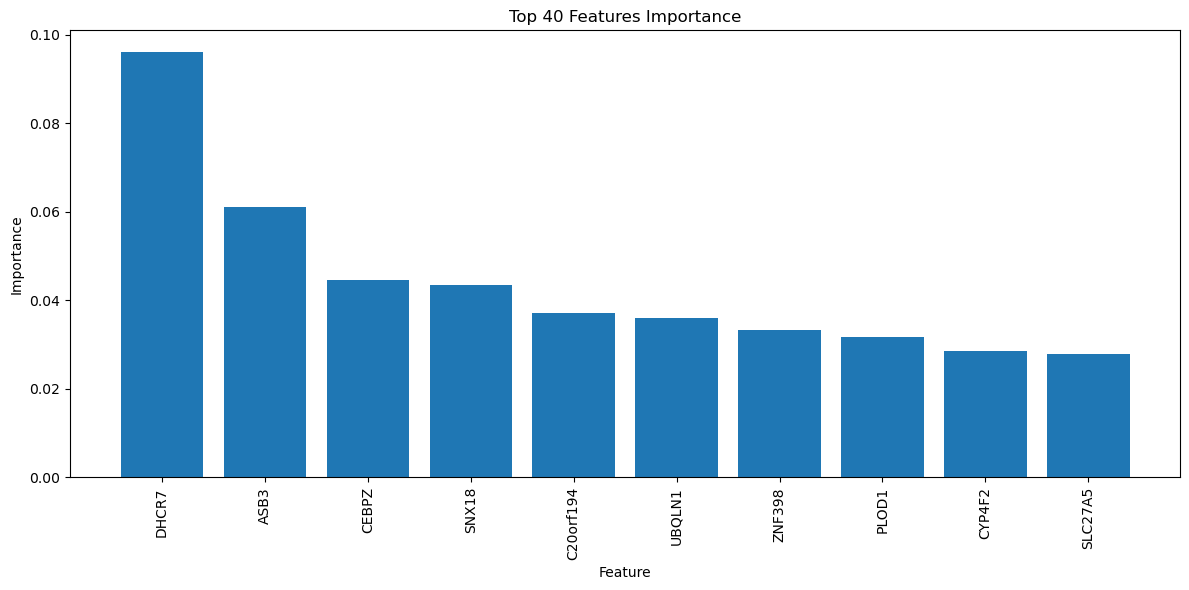

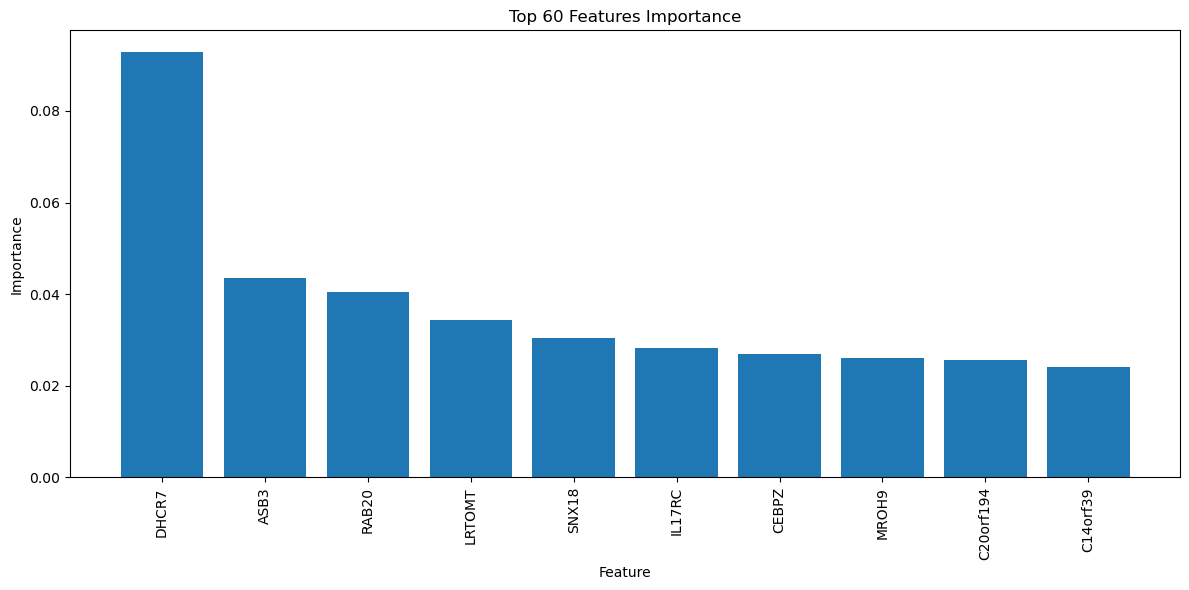

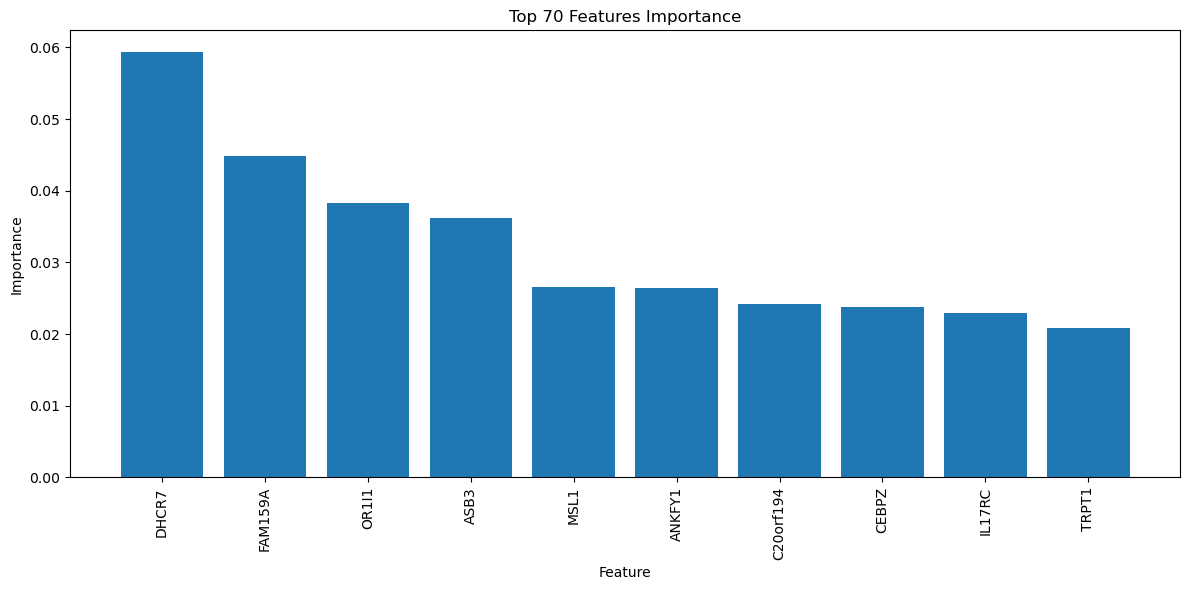

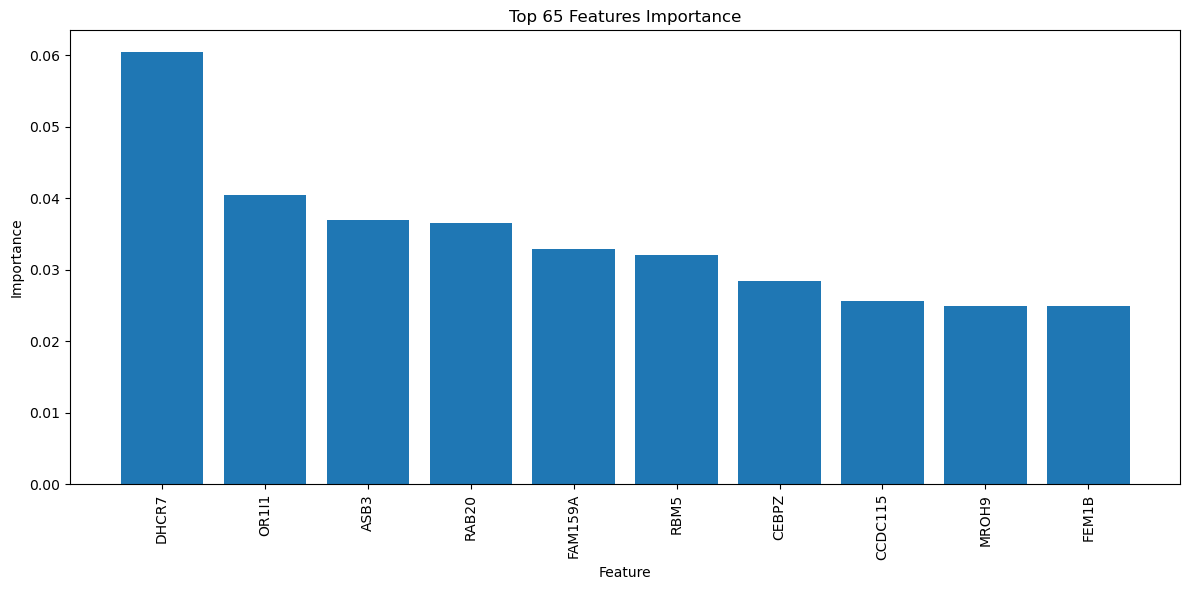

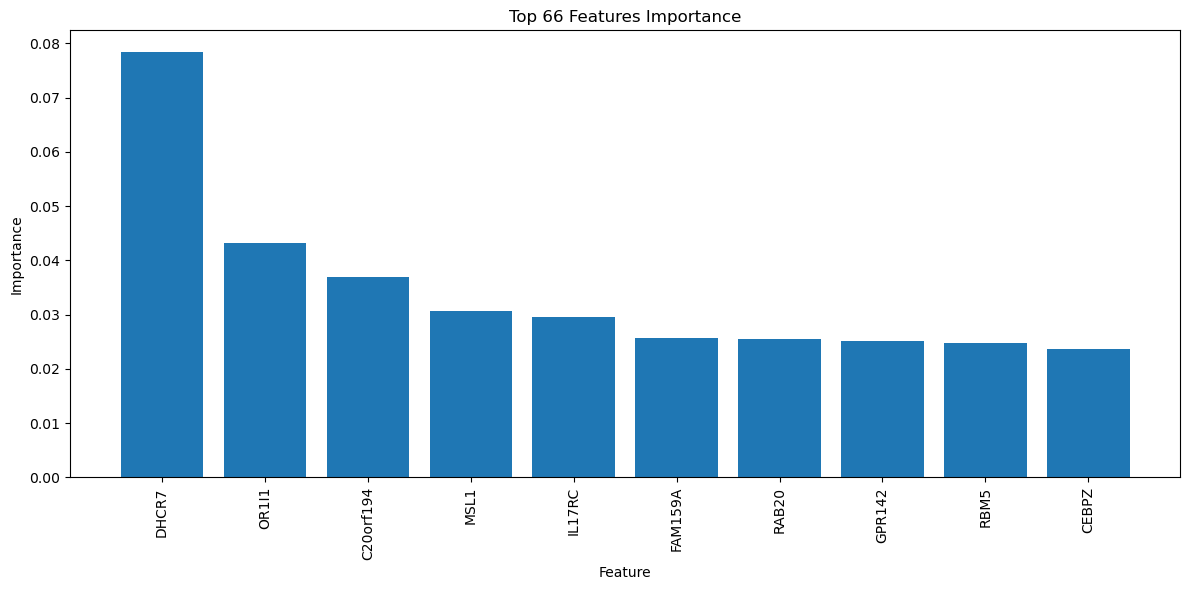

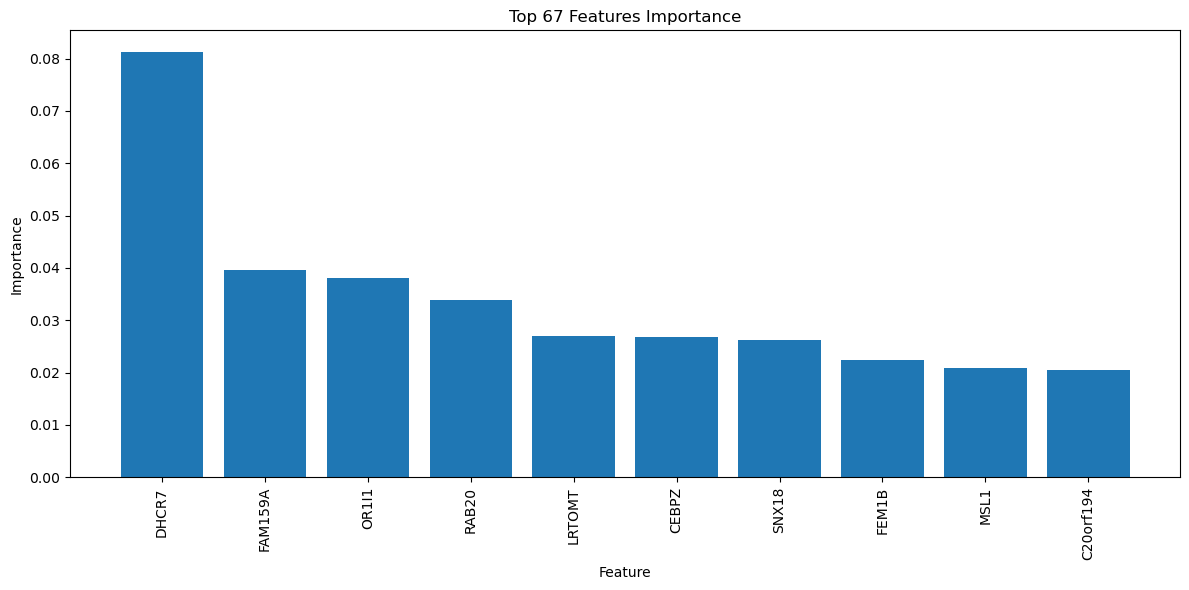

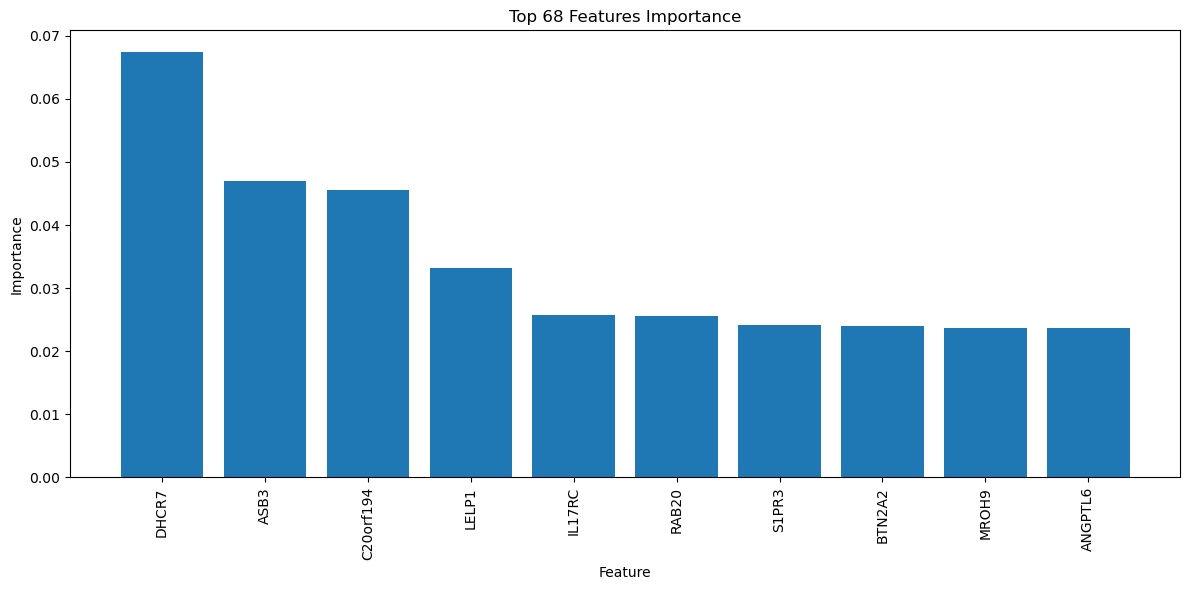

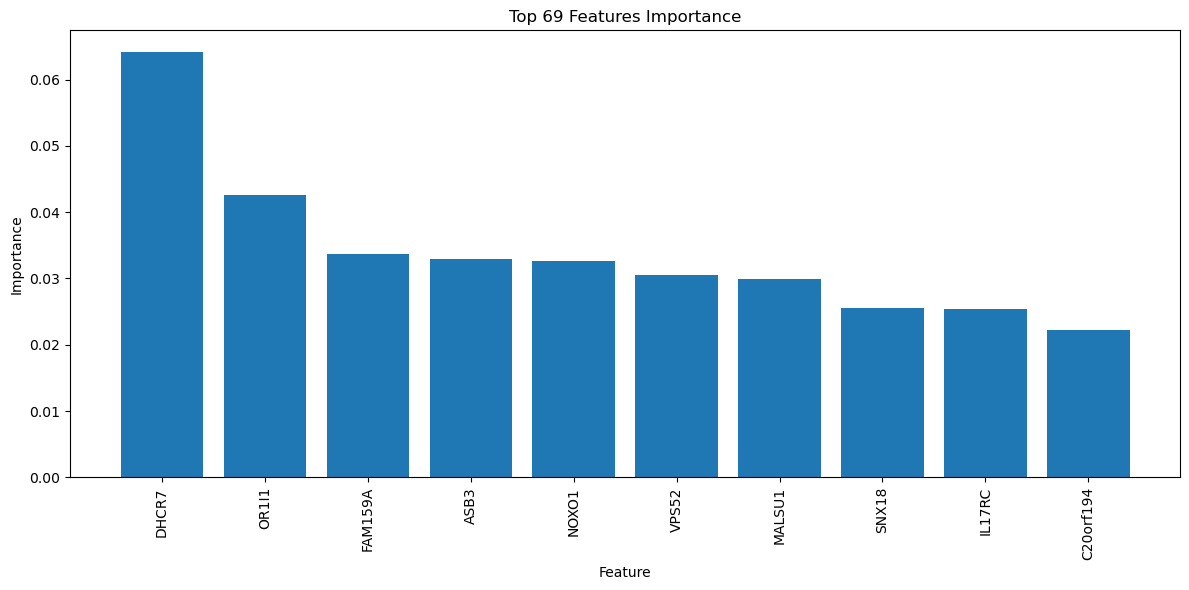

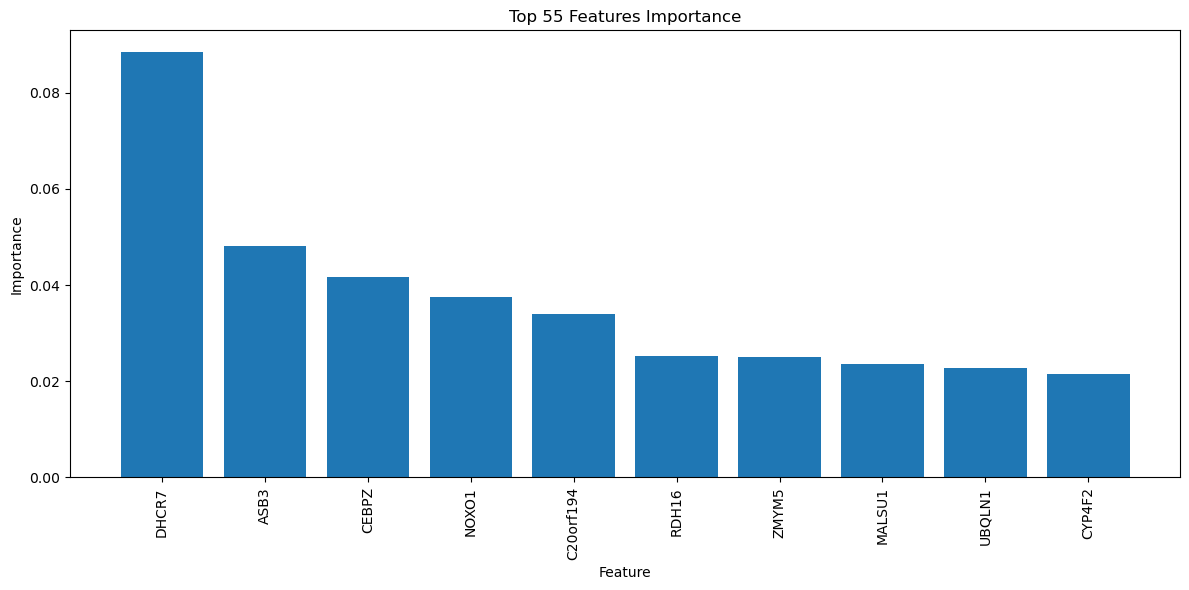

Top 20 Features: ['PLOD1', 'MFSD9', 'ODAM', 'UCP1', 'SNX18', 'EPB41L2', 'PEX1', 'UBQLN1', 'S1PR3', 'MINPP1', 'ZNF143', 'DHCR7', 'LRTOMT', 'P2RY6', 'C14orf39', 'TBC1D24', 'ANGPTL6', 'LIM2', 'SLC27A5', 'CTSA']
Top 30 Features: ['PLOD1', 'RHBG', 'MFSD9', 'RBM5', 'NFKB1', 'UCP1', 'ASIC5', 'LIFR', 'SNX18', 'PDGFRB', 'EPB41L2', 'PEX1', 'UBQLN1', 'S1PR3', 'MINPP1', 'ZNF143', 'DHCR7', 'LRTOMT', 'P2RY6', 'C14orf39', 'IGDCC4', 'NOXO1', 'TBC1D24', 'KRTAP9-8', 'ZNRF4', 'ANGPTL6', 'LIM2', 'SLC27A5', 'CTSA', 'EDA2R']
Top 40 Features: ['PLOD1', 'RHBG', 'GRHL1', 'CEBPZ', 'ASB3', 'MFSD9', 'CCDC115', 'RBM5', 'ODAM', 'NFKB1', 'UCP1', 'ASIC5', 'LIFR', 'SNX18', 'PDGFRB', 'EPB41L2', 'PEX1', 'ZNF398', 'UBQLN1', 'S1PR3', 'MINPP1', 'ZNF143', 'DHCR7', 'LRTOMT', 'P2RY6', 'CCDC60', 'ZMYM5', 'C14orf39', 'IGDCC4', 'TBC1D24', 'UMOD', 'KRTAP3-2', 'RAC3', 'ANGPTL6', 'CYP4F2', 'LIM2', 'SLC27A5', 'C20orf194', 'CTSA', 'EDA2R']
Top 60 Features: ['PLOD1', 'RHBG', 'MROH9', 'GRHL1', 'CEBPZ', 'ASB3', 'MFSD9', 'CCDC115', 'TMEM

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
# Assuming 'df' contains your dataset

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

Feature_Names = X.columns

# Perform feature selection using mutual information with a classifier
# k_values = [10, 15, 25, 50, 100, 150,175,180, 200]  # Number of top features to select
k_values = [20,30,40,60,70,65,66,67,68,69,55]
# Create a dictionary to store the selected features for each k value
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)

    selected_features = [Feature_Names[i] for i in selector.get_support(indices=True)]

    selected_features_dict[k] = selected_features

    # Use a RandomForestClassifier to get feature importances
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_new, y)
    feature_importances = clf.feature_importances_

    # Sort features by importance
    sorted_idx = np.argsort(feature_importances)[::-1]
    # Select the top 100 most important features
    top_features = sorted_idx[:10]

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(len(top_features)),
            feature_importances[top_features], align="center")
    plt.xticks(range(len(top_features)), [
               selected_features[i] for i in top_features], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    new_df = pd.DataFrame(X_new, columns=selected_features, index=df.index)
    new_df['Diagnosis'] = y.values

    # Save the DataFrame to a CSV file with a custom path and a name indicating the value of k
    file_path = f"C:/Users/ACER/OneDrive - University of Jaffna/UOJ/Education/Research/Data Sets/GSE140842/Feature Selection/Information Gain/data_k_{k}.csv"
    new_df.to_csv(file_path)

# Print the selected features for each k value
for k, features in selected_features_dict.items():
    print(f"Top {k} Features: {features}")

# Print feature importances for the top features
for k in k_values:
    print(f"Top {k} Feature Importances:")
    top_feature_importances = [(selected_features[i], feature_importances[i])
                               for i in sorted_idx[:k]]
    for index, (feature, importance) in enumerate(top_feature_importances, start=1):
        print(f"{index} - {feature}: {importance:.4f}")